# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
df = pd.read_csv('ames.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Columns with missing values (percentage):")
print(missing_summary.round(2))

Columns with missing values (percentage):
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [4]:
df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True)

In [5]:
df.dropna(subset=(['LotFrontage',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'BsmtExposure',
    'BsmtFinType2',
    'BsmtFinType1',
    'BsmtCond',
    'BsmtQual',
    'MasVnrType',
    'Electrical']), inplace=True)

In [6]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [7]:
# Your code here - continuous numeric predictor
continuous_cols = df.select_dtypes(include='float64').columns
continuous_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Discrete Numeric Predictor

In [8]:
# Your code here - discrete numeric predictor
discrete_cols = df.select_dtypes(include='int64').columns
discrete_cols


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### String Categorical Predictor

In [9]:
# Your code here - string categorical predictor
string_cat_cols = df.select_dtypes(include=['object', 'string']).columns
string_cat_cols


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Discrete Categorical Predictor

In [10]:
# Your code here - discrete categorical predictor
discrete_categorical = df.select_dtypes(include='int64').loc[:, df.nunique() < 15].columns
discrete_categorical


Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold'],
      dtype='object')

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [11]:
df['RoofStyle']

Id
1       Gable
2       Gable
3       Gable
4       Gable
5       Gable
        ...  
1456    Gable
1457    Gable
1458    Gable
1459      Hip
1460    Gable
Name: RoofStyle, Length: 1094, dtype: object

In [12]:
# Your code here - prepare X and y, including one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)
df_cat = df[['RoofStyle']].copy()
ohe.fit(df_cat)
ohe.transform(df_cat)
X = df[["GrLivArea", "OverallQual", "RoofStyle"]]
y = df['SalePrice']


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Your answer here - which category or categories were dropped?
''' 
Gable
'''

' \nGable\n'

In [24]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
# creating a new dataframe
df_cat_ohe = pd.DataFrame(
    ohe.transform(df_cat),
    columns=[f'RoofStyle_{cat}' for cat in ohe.categories_[0][1:]],
    index=df_cat.index
)
df_cat_ohe
X_sklearn = pd.concat([df[["GrLivArea", "OverallQual"]],df_cat_ohe],axis=1)
X_sklearn
X_sklearn = sm.add_constant(X_sklearn)
model = sm.OLS(y, X_sklearn).fit()
print(model.summary())

y_pred = model.predict(X_sklearn)
print(y_pred)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     464.1
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.18e-295
Time:                        12:24:42   Log-Likelihood:                -13250.
No. Observations:                1094   AIC:                         2.651e+04
Df Residuals:                    1087   BIC:                         2.655e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.135e+05   2.09e+0

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

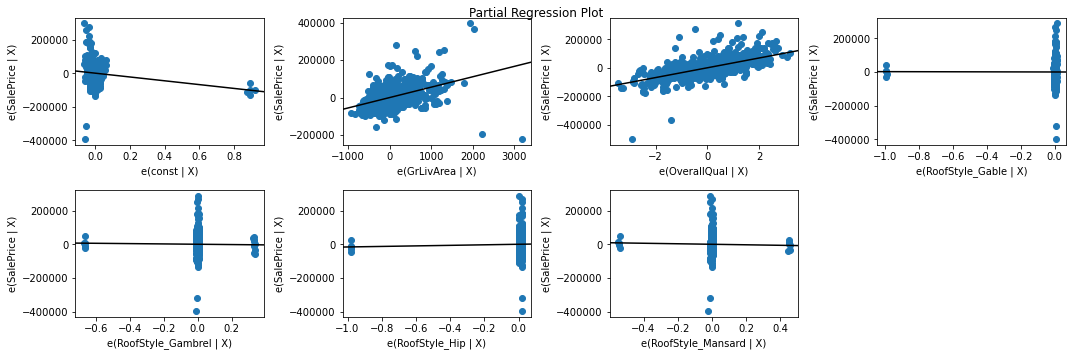

In [25]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
fig=plt.figure(figsize = (15,5))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(X_sklearn.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [26]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

RMSE: 44047.86831709718


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [ ]:
# Your code here
''' 
The model explains about 71.9% of the variation in house prices, meaning it captures
most of the important factors influencing sale price. Two key predictors—GrLivArea 
(above-ground living space) and OverallQual (quality rating)—have a strong positive impact on price.
Specifically:

For every additional square foot of living space, the price increases by about $55.

Each one-point increase in overall quality adds approximately $34,200 to the price.

We also included RoofStyle as a categorical feature. However, the model suggests that roof style 
has little to no significant impact on sale price when controlling for size and quality. 
Here's how each roof type compares to the reference group (likely the least common or alphabetically 
first):

Gable: Slight negative effect (-$2,016), but not statistically significant.

Gambrel: Negative effect (-$9,476), also not significant.

Hip: Positive effect (+$16,090), yet not statistically meaningful.

Mansard: Negative effect (-$15,160), again not significant.

In simple terms: while roof style may affect a home's look or function, buyers mostly care about 
space and quality, not the roof shape.
'''

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.